# Intro
In this tutorial you will see a little example about
*   How to download a dataset
*   How to load it into dataframes
*   How to use extract basic features from the corpus
*   How to train a classifier on those features
*   How to perform basic pre-processing
*   How to use basic word embeddings
*   How to plot results

The task that will be addressed is document classification, specifically tasks related to sentiment classification.


# Preparation of the dataset

## Preliminary Steps
These are some preliminary steps before addressing the task.
Import some basic libraries and set a variable that will be used in multiple steps.

In [39]:
# The libraries we will use are imported here, in case of runtime problems
import os, shutil  #  file management
import sys 
import pandas as pd  #  dataframe management
import numpy as np  #  data manipulation

In [40]:
dataset_name = "aclImdb"

If it is necessary, clean all the data that are in the DATASETS directory and wipe out all the subdirectories.




```
folder = os.getcwd()

print("Current work directory: " + str(folder))

dataset_folder = os.path.join(os.getcwd(), "Datasets")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

for filename in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

print("Cleaned")
```



## Dataset Download
Dowload the Imdb movie reviews dataset


In [41]:
import urllib.request  #  download files
import tarfile  #  unzip files

dataset_folder = os.path.join(os.getcwd(), "Datasets", "Original")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset_path = os.path.join(dataset_folder, "Movies.tar.gz")

if not os.path.exists(dataset_path):
    urllib.request.urlretrieve(url, dataset_path)
    print("Successful download")

tar = tarfile.open(dataset_path)
tar.extractall(dataset_folder)
tar.close()
print("Successful extraction")

Successful extraction


Look at the files you have downloaded to understand the structure of the dataset.

In [42]:
dataset_name = "aclImdb"


file_path = os.path.join(os.getcwd(), "Datasets", "Original", dataset_name, 'train', 'pos', "0_9.txt")

if os.path.isfile(file_path):
    # open the file
    with open(file_path, mode='r', encoding='utf-8') as text_file:
        text = text_file.read()
        print(text)

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!


## Create the dataframe
Now the dataset is loaded into a dataframe to be more accessible.
During the creation some data will be printed as an example.

In [43]:
dataset_name = "aclImdb"

debug = True

dataframe_rows = []

for split in ['train', 'test']:
    for sentiment in ['pos', 'neg']:
        folder = os.path.join(os.getcwd(), "Datasets", "Original", dataset_name, split, sentiment)
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            try:
                if os.path.isfile(file_path):
                    # open the file
                    with open(file_path, mode='r', encoding='utf-8') as text_file:
                        # read it and extract informations
                        text = text_file.read()
                        score = filename.split("_")[1].split(".")[0]
                        score = int(score)
                        file_id = filename.split("_")[0]

                        num_sentiment = -1

                        if sentiment == "pos" : num_sentiment = 1
                        elif sentiment == "neg" : num_sentiment = 0

                        # create single dataframe row
                        dataframe_row = {
                            "file_id": file_id,
                            "score": score,
                            "sentiment": num_sentiment,
                            "split": split,
                            "text": text
                        }

                        # print detailed info for the first file
                        if debug:
                            print(file_path)
                            print(filename)
                            print(file_id)
                            print(text)
                            print(score)
                            print(sentiment)
                            print(split)
                            print(dataframe_row)
                            debug = False
                        dataframe_rows.append(dataframe_row)

            except Exception as e:
                print('Failed to process %s. Reason: %s' % (file_path, e))
                sys.exit(0)

folder = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name)
if not os.path.exists(folder):
    os.makedirs(folder)

# transform the list of rows in a proper dataframe
dataframe = pd.DataFrame(dataframe_rows)
dataframe = dataframe[["file_id",
                       "score",
                       "sentiment",
                       "split",
                       "text"]]
dataframe_path = os.path.join(folder, dataset_name + ".pkl")
dataframe.to_pickle(dataframe_path)

/content/Datasets/Original/aclImdb/train/pos/11367_10.txt
11367_10.txt
11367
Caution: May contain spoilers...<br /><br />I've seen this movie 3 times & I've liked it every time. Upon seeing it again, I'm always reminded of how good it is. An HBO TV movie- very well done like most of their movies are- this would've gotten Oscars for it's performances had it been released for general distribution instead of made for TV.<br /><br />As I'm sure anyone knows from reading other reviews here, this is the story of serial murderer, Andrei Chikatilo. He murdered 56 people over 8 years in the former Soviet Union. (3 victims were buried & couldn't be found so he was only convicted of 52 out of 53 of his murders.) The story actually focuses more on the forensic analyst, Victor Burakov played to perfection by Stephen Rea. A man that becomes tortured and obsessed with finding this killer despite the additional obstacles placed by party hacks, his part is essential to be sure. There is a very touching

## Dataset Analysis

Little analysis of the dataframe

In [44]:
dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

print("Dataframe structure:")
print(df)
print()


print("Total rows %d" % (len(df)))
print()

Dataframe structure:
      file_id  score  sentiment  split  \
0       11367     10          1  train   
1       10381     10          1  train   
2        7931      8          1  train   
3        5140     10          1  train   
4        6439     10          1  train   
...       ...    ...        ...    ...   
49995   11605      1          0   test   
49996    6042      2          0   test   
49997   11681      1          0   test   
49998   10902      1          0   test   
49999    5734      1          0   test   

                                                    text  
0      Caution: May contain spoilers...<br /><br />I'...  
1      The previous reviewer has said it exactly. I s...  
2      Man, if anyone was expecting a great zombie mo...  
3      I saw "A Page of Madness" in a silent film cou...  
4      I went to see this movie twice within a week a...  
...                                                  ...  
49995  I am astounded that so many people find this f...  
49

In [45]:
column = 'score'
print("Distribution of scores: ")
print(df[column].value_counts())
print()

column = 'sentiment'
print("Distribution of sentiment: ")
print(df[column].value_counts())
print()

column = 'split'
print("Distribution of splits: ")
print(df[column].value_counts())
print()

Distribution of scores: 
1     10122
10     9731
8      5859
4      5331
3      4961
7      4803
9      4607
2      4586
Name: score, dtype: int64

Distribution of sentiment: 
1    25000
0    25000
Name: sentiment, dtype: int64

Distribution of splits: 
train    25000
test     25000
Name: split, dtype: int64



In [46]:

print("Distribution of sentiments in split: ")
print(df.groupby(['split','sentiment']).size())
print()

print("Distribution of scores in split: ")
print(df.groupby(['split','score']).size())
print()

print("Differences in score distribution in split: ")
print(df.groupby(['score','split',]).size())
print()

Distribution of sentiments in split: 
split  sentiment
test   0            12500
       1            12500
train  0            12500
       1            12500
dtype: int64

Distribution of scores in split: 
split  score
test   1        5022
       2        2302
       3        2541
       4        2635
       7        2307
       8        2850
       9        2344
       10       4999
train  1        5100
       2        2284
       3        2420
       4        2696
       7        2496
       8        3009
       9        2263
       10       4732
dtype: int64

Differences in score distribution in split: 
score  split
1      test     5022
       train    5100
2      test     2302
       train    2284
3      test     2541
       train    2420
4      test     2635
       train    2696
7      test     2307
       train    2496
8      test     2850
       train    3009
9      test     2344
       train    2263
10     test     4999
       train    4732
dtype: int64



In [47]:

print("Differences among score classes in the splits: ")
print(df.groupby(['sentiment','score','split']).size())
print()

Differences among score classes in the splits: 
sentiment  score  split
0          1      test     5022
                  train    5100
           2      test     2302
                  train    2284
           3      test     2541
                  train    2420
           4      test     2635
                  train    2696
1          7      test     2307
                  train    2496
           8      test     2850
                  train    3009
           9      test     2344
                  train    2263
           10     test     4999
                  train    4732
dtype: int64



### Plots
Let's do some

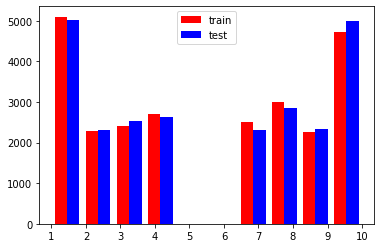

In [48]:
import numpy
from matplotlib import pyplot
train_data = (df.loc[df['split'] == "train"])["score"].tolist()
test_data = (df.loc[df['split'] == "test"])["score"].tolist()


pyplot.xticks(range(1,11))
pyplot.hist([train_data,test_data], bins=10, label=['train','test'], color=["red", "blue"], align="mid")
pyplot.legend(loc='upper center')
pyplot.show()


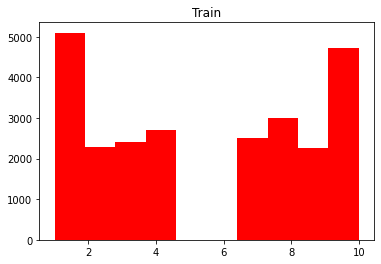

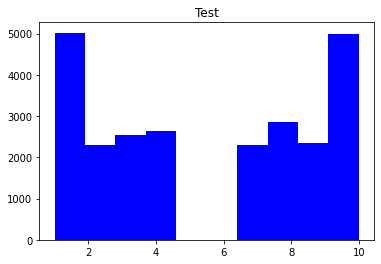

In [49]:
plot1 = pyplot.figure(1)
pyplot.hist(train_data, 10, color="red")
pyplot.title("Train")

plot2 = pyplot.figure(2)
pyplot.hist(test_data, 10, color="blue")
pyplot.title("Test")

pyplot.show()

A little game: let's create a word cloud for the two sentiments and see if there is something interesting.

Total:


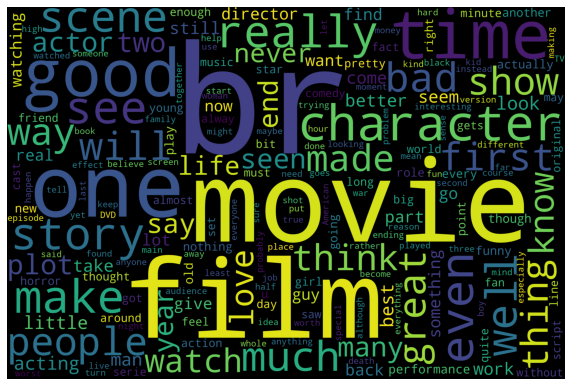

Negative:


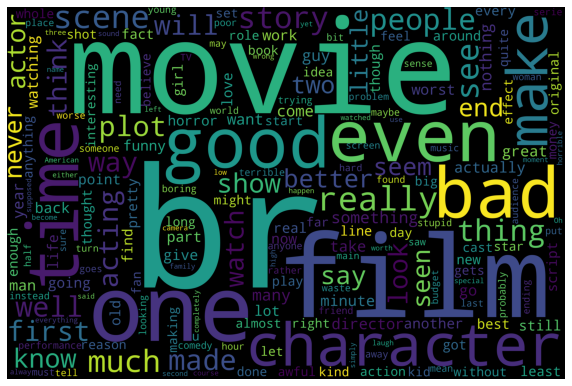

Positive:


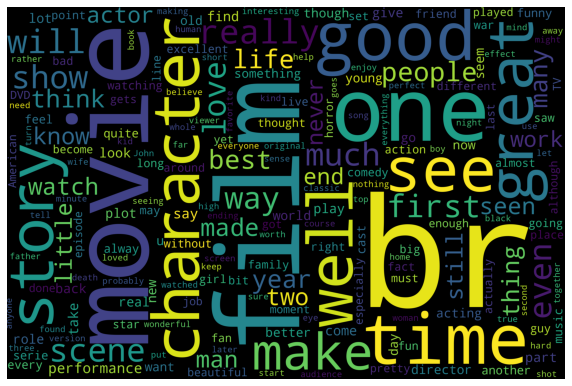

In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

total_corpus = df["text"].tolist()

positive_corpus = df.loc[df['sentiment'] == 1]
positive_corpus = positive_corpus["text"].tolist()

negative_corpus = df.loc[df['sentiment'] == 0]
negative_corpus = negative_corpus["text"].tolist()

print("Total:")
wordcloud1 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(total_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud1) 
plt.axis("off");
plt.show()

print("Negative:")
wordcloud1 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(negative_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud1) 
plt.axis("off");
plt.show()

print("Positive:")
wordcloud2 = WordCloud(width = 3000, height = 2000, collocations=False, stopwords = STOPWORDS).generate(" ".join(positive_corpus))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud2) 
plt.axis("off");
plt.show()

Is there something weird about these words? You can repeat the process multiple times to test your observations.
Is there something that will influence our approach? Think about it...

# Sentiment Analysis

## Features extraction
Let's tackle the Sentiment Analysis task.

The scikit-learn library offers *TfidfVectorizer*, a class that performs both tokenization and the creation of the BoW representation (as tf-idf) of a corpus.

The class has plenty of options: it can be used also to count n-grams, excluding stop-words, and cutting off most and/or less frequent terms.

In [51]:
from sklearn.feature_extraction.text import  TfidfVectorizer

dataframe_path = os.path.join(os.getcwd(), "Datasets", "Dataframes", dataset_name, dataset_name + ".pkl")
df = pd.read_pickle(dataframe_path)

# select only the training sentences
df_train = df.loc[df['split'] == "train"]

train_corpus = df_train['text'].tolist()

print("Processing corpus\n")
vectorizer =  TfidfVectorizer()
# tokenization and creation of Bag of Words representation
X_train = vectorizer.fit_transform(train_corpus)

print("Shape of the matrix: (data points, features)")
print(X_train.shape)
print()

# targets for the training set
Y_train = np.array(df_train['sentiment'].tolist())

Processing corpus

Shape of the matrix: (data points, features)
(25000, 74849)



Fitting on a corpus, the vectorizer creates an internal vocabulary that will be used to create the BoW representation.
The vocabulary is a dictionary that associates to each word a corresponding column in the feature matrix.

Do not try to print the whole vocabulary: it is quite large ;)

In [52]:
print("Size of vocabulary:")
print(len(vectorizer.vocabulary_))
print(type(vectorizer.vocabulary_))

Size of vocabulary:
74849
<class 'dict'>


Since the vocabulary will be quite big, by default X will be a *sparse* matrix (see scipy.sparse for more info).
Basically, it will be a structure where each value is associated to a pair of coordinates in the matrix

In [53]:
print(X_train)

  (0, 62896)	0.02709538458399922
  (0, 39)	0.02120898916118151
  (0, 23528)	0.04147467271843635
  (0, 6648)	0.028900349844154447
  (0, 36915)	0.018770093733829242
  (0, 74324)	0.02272479762226758
  (0, 25808)	0.05464061000207879
  (0, 19974)	0.03354737964654219
  (0, 33813)	0.034276660075194594
  (0, 41832)	0.06889158464880597
  (0, 66376)	0.017654725302492187
  (0, 50189)	0.024669810298929503
  (0, 22730)	0.03168805864190741
  (0, 23529)	0.05146528189034496
  (0, 27616)	0.022168952813886384
  (0, 68799)	0.02976210617879287
  (0, 7045)	0.018596277791078836
  (0, 40601)	0.0343165068532522
  (0, 58273)	0.06635008373941143
  (0, 24637)	0.028783644718166905
  (0, 4297)	0.022102317743905902
  (0, 2662)	0.01165205362090601
  (0, 65348)	0.025159728150859876
  (0, 1277)	0.013214102625849022
  (0, 53839)	0.015468816992769434
  :	:
  (24999, 3258)	0.10664421029619695
  (24999, 66322)	0.0995898249664033
  (24999, 67125)	0.043851042664244486
  (24999, 46957)	0.08643244248088262
  (24999, 72196)	0.

All the scipy tools are compatible with sparse matrices, but if you somehow need the traditional representation it is possible to convert it with the following command. Keep in mind that if the vocabulary and/or the dataset are large, the resulting array will be quite large, possibly occupying all the RAM.


```
X.toarray()
```



It is then possible to parse the test split likewise. Remember to use the transform function and not the fit_transform when working on the test set.

In [54]:
# select only the test sentences
df_test = df.loc[df['split'] == "test"]
test_corpus = df_test['text'].tolist()
X_test = vectorizer.transform(test_corpus)
Y_test = np.array(df_test['sentiment'].tolist())

**GOLDEN RULE: DO NOT EVER EVER EVER EVER EVER EVER MESS WITH THE TEST SET!!!!**

You should never add or remove rows/instances/data points from the test set.
And NEVER alter the ground truth/labels.

What you can do with the test set is obviously process it to transform, add, or remove columns/features.

On the train set instead you can do what you want: add stuff, remove stuff, change it, oversample, undersample, cut, paste, whatever.

But do not **EVER** do that with the test set. The test set is untouchable, is pure gold, and you should not even put your gross fingerprints on it!

## Training and Testing
It is now possible to choose one of the many models available in the sci-kit learn library, train it and test it.

### Baselines: Majority and Random Uniform
First, we try a couple of dummy classifiers as baseline: one always predict the majority class, the other one makes uniform random predictions.
Their performances will tell us how much difficult this task is.

In [55]:
# dummies
from sklearn.dummy import DummyClassifier

majority_classifier = DummyClassifier(strategy="prior")
uniform_classifier = DummyClassifier(strategy="uniform")

majority_classifier.fit(X_train, Y_train)
uniform_classifier.fit(X_train, Y_train)

Y_pred_train_maj = majority_classifier.predict(X_train)
Y_pred_test_maj = majority_classifier.predict(X_test)
Y_pred_train_uni = uniform_classifier.predict(X_train)
Y_pred_test_uni = uniform_classifier.predict(X_test)

In [56]:
# print results
from sklearn.metrics import classification_report

print("Majority")
report_train = classification_report(Y_train, Y_pred_train_maj, target_names=["neg", "pos"])
report_test = classification_report(Y_test, Y_pred_test_maj, target_names=["neg", "pos"])
print("Train")
print(report_train)
print("Test")
print(report_test)

Majority
Train
              precision    recall  f1-score   support

         neg       0.50      1.00      0.67     12500
         pos       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000

Test
              precision    recall  f1-score   support

         neg       0.50      1.00      0.67     12500
         pos       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Two words about metrics!

In most cases, accuracy is not a very informative metric. Precision, recall, and F1 are almost always better.

F1 is generally a good indicator. In particular, macro F1 in case the test set in unbalanced.
Whether precision or recall are more important depends on the specific application, if the priority is to avoid false positives or false negatives.
Other metrics do exists (e.g., Area Under ROC Curve), always check the literature to find the most informative way to measure something!

What happens if the test set is not balanced?
Try at home!

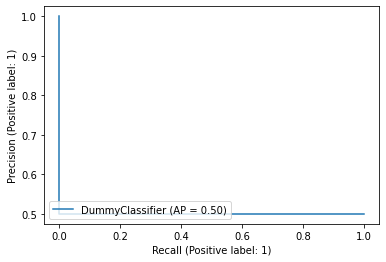

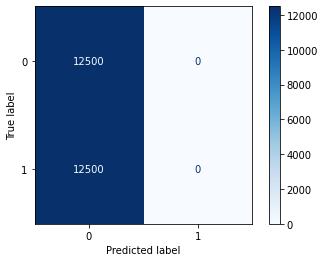

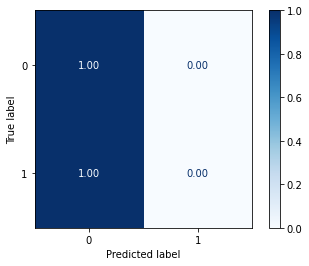

In [57]:
# more advanced tools
# plot precision/recall curve and confusion matrix
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# disp = plot_precision_recall_curve(majority_classifier, X_test, Y_test)

PrecisionRecallDisplay.from_estimator(majority_classifier, X_test, Y_test)
ConfusionMatrixDisplay.from_estimator(majority_classifier, X_test, Y_test, normalize=None, cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_estimator(majority_classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")


# confusion_m = confusion_matrix(Y_test.astype('int'), Y_pred_train_maj.astype('int'), labels=[1,2,3,4,7,8,9,10])


# matdisp = ConfusionMatrixDisplay(confusion_m, display_label=[1,2,3,4,7,8,9,10])
# matdisp.plot()
# plt.show()

# plot_confusion_matrix(majority_classifier, X_test, Y_test, normalize=None, cmap=plt.cm.Blues)
# plot_confusion_matrix(majority_classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")

Confusion matrix...better normalized or not??
In most cases it is better to use the normalized version, especially with unbalanced distributions!

Also, remember: looking at confusion tables row-wise gives information about recall, looking column-wise gives information about precision.

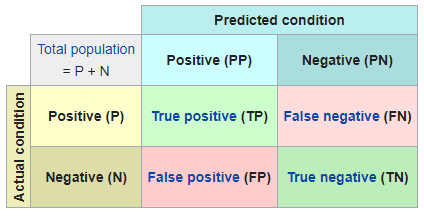

(wikipedia)

Uniform
Train
              precision    recall  f1-score   support

         neg       0.51      0.50      0.51     12500
         pos       0.51      0.51      0.51     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.51      0.51      0.51     25000

Test
              precision    recall  f1-score   support

         neg       0.51      0.50      0.51     12500
         pos       0.51      0.51      0.51     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.51     25000
weighted avg       0.51      0.51      0.51     25000



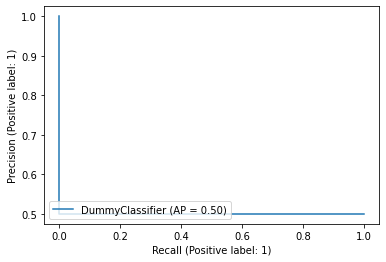

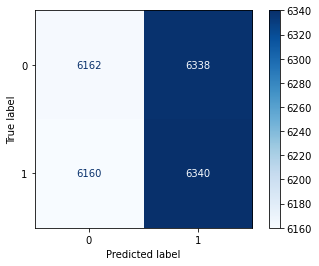

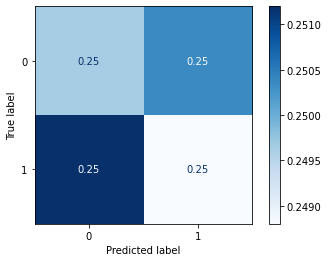

In [58]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

print("Uniform")
report_train = classification_report(Y_train, Y_pred_train_uni, target_names=["neg", "pos"])
report_test = classification_report(Y_test, Y_pred_train_uni, target_names=["neg", "pos"])
print("Train")
print(report_train)
print("Test")
print(report_test)

PrecisionRecallDisplay.from_estimator(uniform_classifier, X_test, Y_test)
ConfusionMatrixDisplay.from_estimator(uniform_classifier, X_test, Y_test, normalize=None, cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_estimator(uniform_classifier, X_test, Y_test, normalize='all', cmap=plt.cm.Blues, values_format=".2f")

### SVC Classifier
Now, let's try something real.

In [59]:
# training and testing
from sklearn.svm import LinearSVC, SVC

svc_classifier = LinearSVC()

svc_classifier.fit(X_train, Y_train)

Y_pred_train_svc = svc_classifier.predict(X_train)
Y_pred_test_svc = svc_classifier.predict(X_test)

In [60]:
# print results
from sklearn.metrics import classification_report

report_train = classification_report(Y_train, Y_pred_train_svc, target_names=["neg", "pos"])
report_test = classification_report(Y_test, Y_pred_test_svc, target_names=["neg", "pos"])
print("Train")
print(report_train)
print("Test")
print(report_test)

Train
              precision    recall  f1-score   support

         neg       0.99      0.99      0.99     12500
         pos       0.99      0.99      0.99     12500

    accuracy                           0.99     25000
   macro avg       0.99      0.99      0.99     25000
weighted avg       0.99      0.99      0.99     25000

Test
              precision    recall  f1-score   support

         neg       0.87      0.89      0.88     12500
         pos       0.89      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



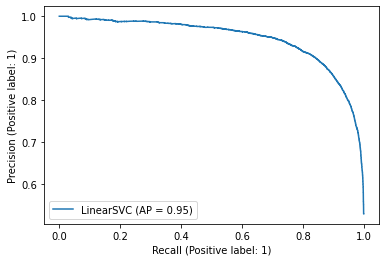

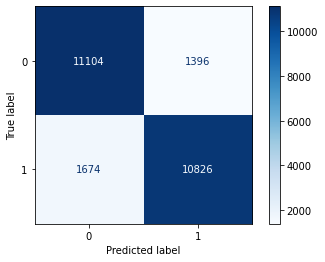

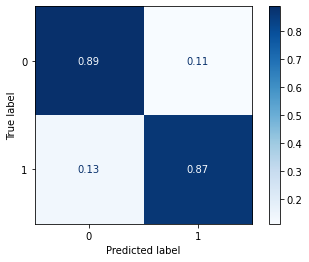

In [61]:

from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

PrecisionRecallDisplay.from_estimator(svc_classifier, X_test, Y_test)
ConfusionMatrixDisplay.from_estimator(svc_classifier, X_test, Y_test, cmap=plt.cm.Blues)
ConfusionMatrixDisplay.from_estimator(svc_classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f")


### A bit of error analysis

Let's try to understand what kind of errors are done by the model. For example, we can look at specific cases of error

In [62]:
# confidence of the model
confidence = svc_classifier.decision_function(X_test)

fp_i = []
fn_i = []
fp_v = []
fn_v = []
fp_c = []
fn_c = []

for index, value in enumerate(Y_test):
    # false positives
    if value==0 and Y_pred_test_svc[index]==1:
        fp_i.append(index)
        fp_v.append(value)
        fp_c.append(confidence[index])
    # false negatives
    elif value==1 and Y_pred_test_svc[index]==0:
        fn_i.append(index)
        fn_v.append(value)
        fn_c.append(confidence[index])



Examples of FN and FP and the confidence in their classification

In [63]:
print("FN")

for index in [0, 3, 6, 9]:
    print(test_corpus[fn_i[index]])
    print(fn_c[index])
    print()

print()
print("FP")

for index in [0, 3, 6, 9]:
    print(test_corpus[fp_i[index]])
    print(fp_c[index])
    print()

FN
What a show! Lorenzo Lamas once again proves his talent as a cop who committed the worst crime a good cop can commit, by being a good cop. Then, again, he shows how sensitive a cop can be, displaying a range of emotions like no other actor can except, maybe, himself in Terminal justice.<br /><br />HUGE ENJOYMENT!
-0.44107676081143243

With all of mainland Europe under his control Hitler prepares for the last obstacle in his way before heading for North America, Great Britain. With an overwhelming edge in aircraft Goering's Luftwaffe looks unstoppable on paper. Once in the air however the RAF tenaciously disrupts the paradigm by blowing the enemy out of sky air at a seven to one rate. The Battle of Britain rages on for a over a year as the Island nation is bloodied but unbowed providing crucial time for their American allies to produce more arms for the inevitable struggle. <br /><br />Using more staged footage than the three previous documentaries in the Why We Fight series the Batt

The sentences for which the classification error is bigger


In [64]:
max_fp = fp_c.index(max(fp_c))
print(test_corpus[fp_i[max_fp]])
print(fp_c[max_fp])

print()

# for false negatives the confidence is negative
max_fn = fn_c.index(min(fn_c))
print(test_corpus[fp_i[max_fn]])
print(fn_c[max_fn])

This movie was pure genius. John Waters is brilliant. It is hilarious and I am not sick of it even after seeing it about 20 times since I bought it a few months ago. The acting is great, although Ricki Lake could have been better. And Johnny Depp is magnificent. He is such a beautiful man and a very talented actor. And seeing most of Johnny's movies, this is probably my favorite. I give it 9.5/10. Rent it today!
2.0703147048532613

The Girl in Lovers' Lane: 3 out of 10: Homoerotic subtext in the movies is a well known phenomenon. Plenty of dissertations have come out of film schools about the hidden subtexts in such films as Top Gun and Spartacus. The Girl in Lover’s Lane certainly fits the homoerotic trope. In fact, it is so blatant and over the top even MST3K, whom rarely notes such things in their riffing, simply cannot avoid it.<br /><br />The film is about two drifters. One a rich kid (Lowell Brown) running away from home with a hundred dollars and no street smarts, the other is a

# Now...score prediction!

Now, rather then sentiment classification, try to address the task of score prediction on the same dataset: based on the text of the reviews, try to predict the score assigned by the reviewer.

We can address this problem either as a regression problem or a classification problem, the priority is the problem as regression. Indeed, the classification perspective does penalize each error in the same way, while the regression perspective considers the difference between the predicted value and the real value (prediction 8 for real value 2 is way worse than prediction 3 for value 2).
The classification perspective is a tool to understand the problem better and experiment.


In [65]:
Y_train = np.array(df_train['score'].tolist())
Y_test = np.array(df_test['score'].tolist())

## Classifiers

### Baselines

In [66]:
from sklearn.dummy import DummyClassifier

maj_classifier = DummyClassifier(strategy="prior")
uni_classifier = DummyClassifier(strategy="uniform")

maj_classifier.fit(X_train, Y_train)
uni_classifier.fit(X_train, Y_train)

Y_pred_test_maj = maj_classifier.predict(X_test)
Y_pred_test_uni = uni_classifier.predict(X_test)

MAJORITY
R2 score -1.671340
MAE 4.512960
MSE 32.552720

              precision    recall  f1-score   support

           1       0.20      1.00      0.33      5022
           2       0.00      0.00      0.00      2302
           3       0.00      0.00      0.00      2541
           4       0.00      0.00      0.00      2635
           7       0.00      0.00      0.00      2307
           8       0.00      0.00      0.00      2850
           9       0.00      0.00      0.00      2344
          10       0.00      0.00      0.00      4999

    accuracy                           0.20     25000
   macro avg       0.03      0.12      0.04     25000
weighted avg       0.04      0.20      0.07     25000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


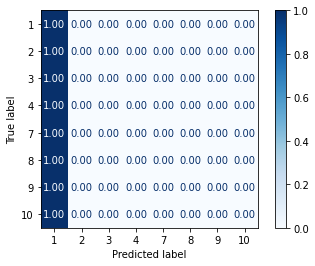

In [67]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt


print("MAJORITY")
# task as regression


r2_maj = r2_score(Y_test, Y_pred_test_maj)
mae_maj = mean_absolute_error(Y_test, Y_pred_test_maj)
mse_maj = mean_squared_error(Y_test, Y_pred_test_maj)

print("R2 score %f" % r2_maj)
# Mean Absolute Error
print("MAE %f" % mae_maj)
# Mean Squared Error
print("MSE %f" % mse_maj)
print()

# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_maj.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)


ConfusionMatrixDisplay.from_estimator(maj_classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])


Accuracy is 20%, not even too awful...but it happens only when we predict 1!

In [68]:
print("RANDOM UNIFORM")
# task as regression

r2_uni = r2_score(Y_test, Y_pred_test_uni)
mae_uni = mean_absolute_error(Y_test, Y_pred_test_uni)
mse_uni = mean_squared_error(Y_test, Y_pred_test_uni)

print("R2 score %f" % r2_uni)
# Mean Absolute Error
print("MAE %f" % mae_uni)
# Mean Squared Error
print("MSE %f" % mse_uni)
print()


# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_uni.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)


RANDOM UNIFORM
R2 score -0.849257
MAE 3.805920
MSE 22.534880

              precision    recall  f1-score   support

           1       0.20      0.13      0.16      5022
           2       0.10      0.13      0.11      2302
           3       0.10      0.13      0.11      2541
           4       0.10      0.12      0.11      2635
           7       0.09      0.12      0.10      2307
           8       0.12      0.13      0.12      2850
           9       0.10      0.13      0.11      2344
          10       0.20      0.12      0.15      4999

    accuracy                           0.13     25000
   macro avg       0.13      0.13      0.12     25000
weighted avg       0.14      0.13      0.13     25000



Accuracy is down, but other scores are up! Why? We are less good at making a correct prediction, but there is at leas a small chance to correctly predict each class!

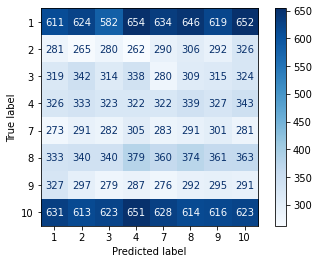

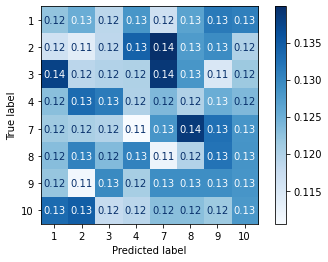

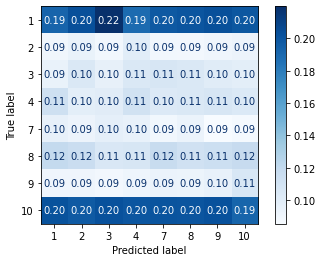

In [69]:
# fancy confusion matrix
ConfusionMatrixDisplay.from_estimator(uni_classifier, X_test, Y_test, normalize=None, cmap=plt.cm.Blues, labels=[1,2,3,4,7,8,9,10])
disp1 = ConfusionMatrixDisplay.from_estimator(uni_classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])

disp2 = ConfusionMatrixDisplay.from_estimator(uni_classifier, X_test, Y_test, normalize='pred', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])


See the difference between a normalized confusion matrix and one that is not? In the first one it is a bit more difficult to see the uniformity of the predictions. They are still uniform (row-wise), but the unbalance in the distribution makes it less evident.

What does the third table tells us? It tells us information about the precision of the model. 
It seems to have a neat division color-wise, but number-wise is not so true. So, let's normalize the use of colors

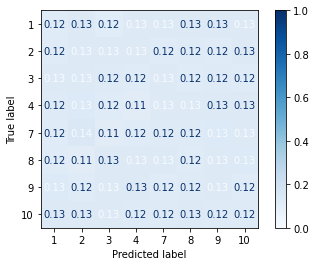

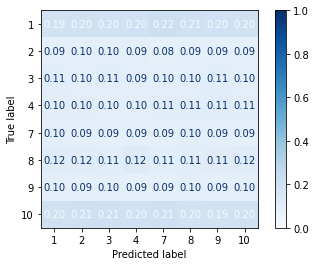

In [70]:
disp1 = ConfusionMatrixDisplay.from_estimator(uni_classifier, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])
disp1.ax_.get_images()[0].set_clim(0, 1)

disp2 = ConfusionMatrixDisplay.from_estimator(uni_classifier, X_test, Y_test, normalize='pred', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])
disp2.ax_.get_images()[0].set_clim(0, 1)

Not normalizing the colors helps in spotting differences, even if minimal. Normalizing the colors gives us a bit more of perspective.

### A bit of error analysis

Let's compare these results

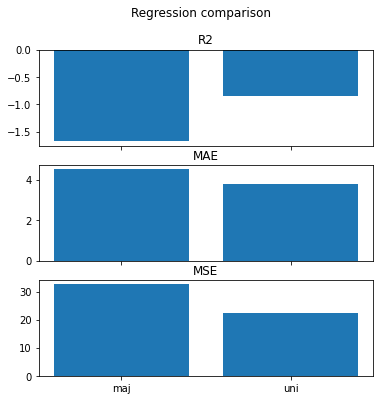

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


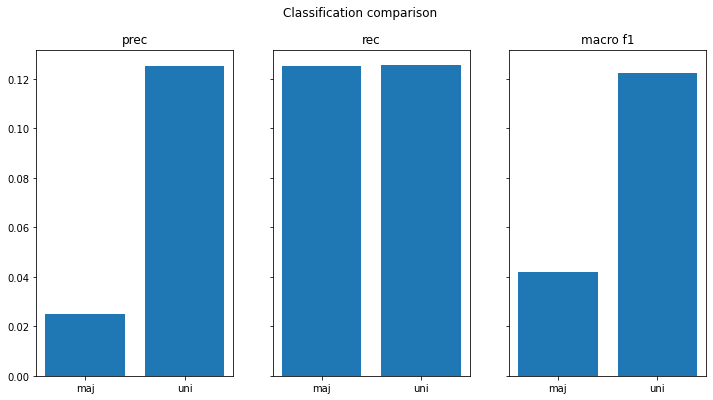

In [71]:
from sklearn.metrics import precision_recall_fscore_support as prfs

fig, plots = pyplot.subplots(3, sharex=True, figsize=(6, 6))
fig.suptitle('Regression comparison')
plots[0].bar(["maj","uni"], [r2_maj, r2_uni])
plots[0].set_title("R2")
plots[1].bar(["maj","uni"], [mae_maj, mae_uni])
plots[1].set_title("MAE")
plots[2].bar(["maj","uni"], [mse_maj, mse_uni])
plots[2].set_title("MSE")

pyplot.show()

prfs_maj = prfs(Y_test.astype('int'), Y_pred_test_maj.astype('int'), labels=[1,2,3,4,7,8,9,10], average="macro")
prfs_uni = prfs(Y_test.astype('int'), Y_pred_test_uni.astype('int'), labels=[1,2,3,4,7,8,9,10], average="macro")

fig2, plots = pyplot.subplots(1,3, sharey=True, figsize=(12, 6))
fig2.suptitle('Classification comparison')
plots[0].bar(["maj","uni"], [prfs_maj[0], prfs_uni[0]])
plots[0].set_title("prec")
plots[1].bar(["maj","uni"], [prfs_maj[1], prfs_uni[1]])
plots[1].set_title("rec")
plots[2].bar(["maj","uni"], [prfs_maj[2], prfs_uni[2]])
plots[2].set_title("macro f1")

pyplot.show()

What can we say?

The uniform performs better. But we can say more!

For MAJ e UNI we have similar recall, but different precision.
Why?


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


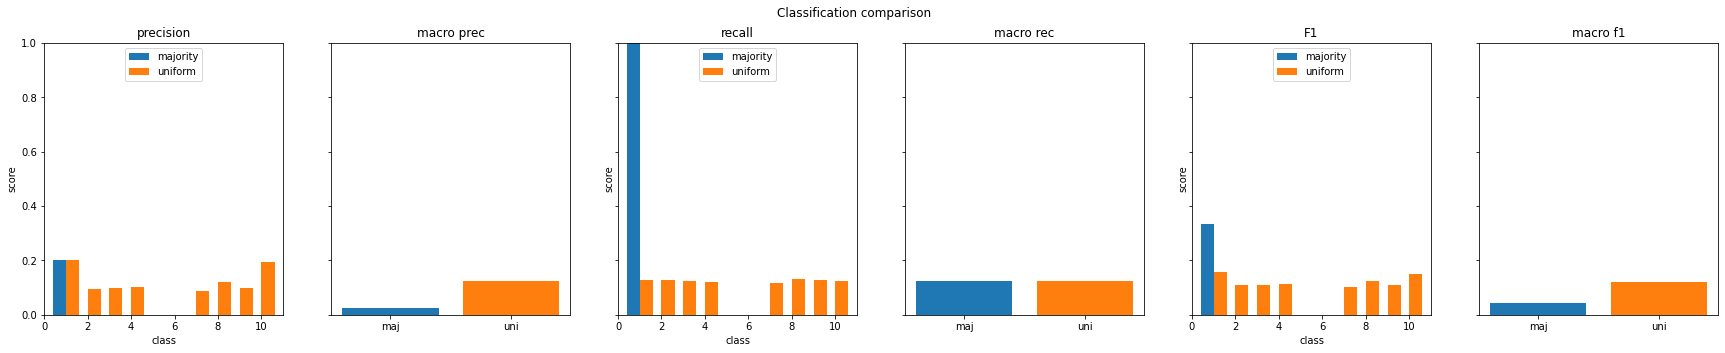

In [72]:

labels = [1,2,3,4,7,8,9,10]
labels_name = ["1","2","3","4","7","8","9","10"]
labels_axis = np.array(labels)

prfs_maj = prfs(Y_test.astype('int'), Y_pred_test_maj.astype('int'), labels=labels, average=None)
prfs_uni = prfs(Y_test.astype('int'), Y_pred_test_uni.astype('int'), labels=labels, average=None)

prfs_maj_macro = prfs(Y_test.astype('int'), Y_pred_test_maj.astype('int'), labels=labels, average="macro")
prfs_uni_macro = prfs(Y_test.astype('int'), Y_pred_test_uni.astype('int'), labels=labels, average="macro")

pyplot.show()


fig1, plots = pyplot.subplots(1,6, sharey=True, figsize=(30, 5))
fig1.suptitle('Classification comparison')


#plots.set_xticks([1,2,3,4,7,8,9,10])
width=0.3

plots[0].bar(labels_axis-width, prfs_maj[0], width*2, label="majority", color="tab:blue")
plots[0].bar(labels_axis+width, prfs_uni[0], width*2, label="uniform", color="tab:orange")
plots[0].set_title("precision")

plots[0].set_ylim([0,1])
plots[0].set_xlim([0,11])
plots[0].set_xlabel("class")
plots[0].set_ylabel("score")
plots[0].legend(loc='upper center')

plots[1].bar(["maj","uni"], [prfs_maj_macro[0], prfs_uni_macro[0]], color=["tab:blue", "tab:orange"])
plots[1].set_title("macro prec")
plots[3].bar(["maj","uni"], [prfs_maj_macro[1], prfs_uni_macro[1]], color=["tab:blue", "tab:orange"])
plots[3].set_title("macro rec")
plots[5].bar(["maj","uni"], [prfs_maj_macro[2], prfs_uni_macro[2]], color=["tab:blue", "tab:orange"])
plots[5].set_title("macro f1")

plots[2].bar(labels_axis-width, prfs_maj[1], width*2, label="majority")
plots[2].bar(labels_axis+width, prfs_uni[1], width*2, label="uniform")
plots[2].set_title("recall")

plots[2].set_ylim([0,1])
plots[2].set_xlim([0,11])
plots[2].set_xlabel("class")
plots[2].set_ylabel("score")
plots[2].legend(loc='upper center')


plots[4].bar(labels_axis-width, prfs_maj[2], width*2, label="majority")
plots[4].bar(labels_axis+width, prfs_uni[2], width*2, label="uniform")
plots[4].set_title("F1")

plots[4].set_ylim([0,1])
plots[4].set_xlim([0,11])
plots[4].set_xlabel("class")
plots[4].set_ylabel("score")
plots[4].legend(loc='upper center')

pyplot.show()


The recall is similar because for UNI is uniformely distributed (more or less).

For MAJ it is the maximum value for the majority class, 0 for the rest.

So, the averages are the same.


If we are interested in predicting only the majority class, the MAJ is bad, but better than UNI. For any other class, UNI is better.


### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(max_iter=1000)

classifier_lr.fit(X_train, Y_train)

Y_pred_test_lr = classifier_lr.predict(X_test)


LOGISTIC REGRESSION
R2 score 0.484575
MAE 1.468200
MSE 6.280920

              precision    recall  f1-score   support

           1       0.53      0.84      0.65      5022
           2       0.21      0.05      0.08      2302
           3       0.27      0.12      0.17      2541
           4       0.32      0.34      0.33      2635
           7       0.32      0.24      0.27      2307
           8       0.27      0.25      0.26      2850
           9       0.23      0.04      0.06      2344
          10       0.49      0.77      0.59      4999

    accuracy                           0.43     25000
   macro avg       0.33      0.33      0.30     25000
weighted avg       0.37      0.43      0.37     25000



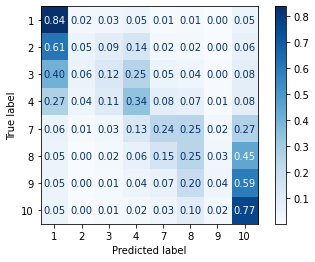

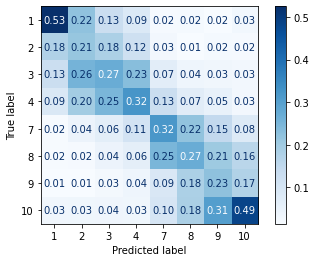

In [74]:

print("LOGISTIC REGRESSION")
# task as regression

r2_lr = r2_score(Y_test, Y_pred_test_lr)
mae_lr = mean_absolute_error(Y_test, Y_pred_test_lr)
mse_lr = mean_squared_error(Y_test, Y_pred_test_lr)

print("R2 score %f" % r2_lr)
# Mean Absolute Error
print("MAE %f" % mae_lr)
# Mean Squared Error
print("MSE %f" % mse_lr)
print()


# task as multiclass classification



report = classification_report(Y_test.astype('int'), Y_pred_test_lr.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

ConfusionMatrixDisplay.from_estimator(classifier_lr, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])
ConfusionMatrixDisplay.from_estimator(classifier_lr, X_test, Y_test, normalize='pred', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])

### Stochastic Gradient Descend Regression

In [75]:
from sklearn.linear_model import SGDRegressor

classifier_sgd = SGDRegressor(max_iter=1000)

classifier_sgd.fit(X_train, Y_train)

Y_pred_test_sgd = classifier_sgd.predict(X_test)


SGD
R2 score 0.575487
MAE 1.868075
MSE 5.173078

              precision    recall  f1-score   support

           1       0.64      0.14      0.23      5022
           2       0.21      0.20      0.20      2302
           3       0.19      0.23      0.21      2541
           4       0.22      0.30      0.25      2635
           7       0.16      0.22      0.18      2307
           8       0.19      0.13      0.16      2850
           9       0.21      0.09      0.12      2344
          10       0.63      0.05      0.09      4999

   micro avg       0.23      0.15      0.19     25000
   macro avg       0.31      0.17      0.18     25000
weighted avg       0.37      0.15      0.18     25000



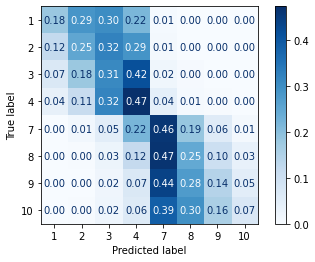

In [76]:
print("SGD")
# task as regression

r2_sgd = r2_score(Y_test, Y_pred_test_sgd)
mae_sgd = mean_absolute_error(Y_test, Y_pred_test_sgd)
mse_sgd = mean_squared_error(Y_test, Y_pred_test_sgd)

print("R2 score %f" % r2_sgd)
# Mean Absolute Error
print("MAE %f" % mae_sgd)
# Mean Squared Error
print("MSE %f" % mse_sgd)
print()
# task as multiclass classification

report = classification_report(Y_test.astype('int'), Y_pred_test_sgd.astype('int'), labels=[1,2,3,4,7,8,9,10])
print(report)

ConfusionMatrixDisplay.from_predictions(Y_test.astype('int'), Y_pred_test_sgd.astype('int'), normalize='true', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])

### Plot time!

SILVER RULES:
1.   Use always the same scale. Whenever you compare two methods, make sure to plot them using the same references for both: same range and scale in the axis!
2.   Do not mix pears and apples: do not put everything in the same plot! Many measures have a 0 to 1 range, but often plotting them together is pointless. For example, do not compare F1 score with accuracy score! They have a different meaning!



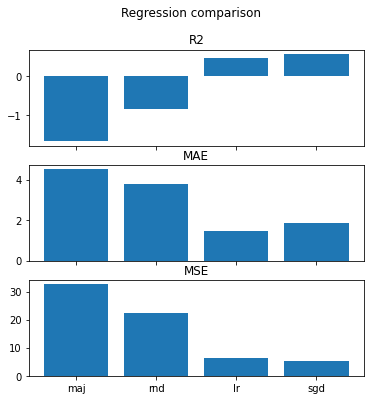

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


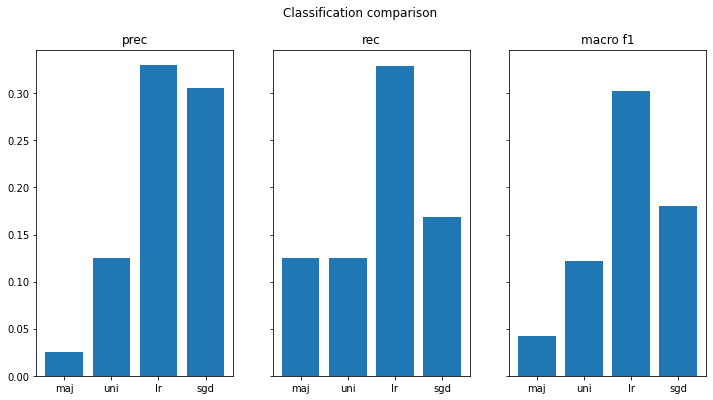

In [77]:
from sklearn.metrics import precision_recall_fscore_support as prfs

fig, plots = pyplot.subplots(3, sharex=True, figsize=(6, 6))
fig.suptitle('Regression comparison')
plots[0].bar(["maj","rnd","lr","sgd"], [r2_maj, r2_uni, r2_lr, r2_sgd])
plots[0].set_title("R2")
plots[1].bar(["maj","rnd","lr","sgd"], [mae_maj, mae_uni, mae_lr, mae_sgd])
plots[1].set_title("MAE")
plots[2].bar(["maj","rnd","lr","sgd"], [mse_maj, mse_uni, mse_lr, mse_sgd])
plots[2].set_title("MSE")

pyplot.show()

prfs_maj = prfs(Y_test.astype('int'), Y_pred_test_maj.astype('int'), labels=[1,2,3,4,7,8,9,10], average="macro")
prfs_rnd = prfs(Y_test.astype('int'), Y_pred_test_uni.astype('int'), labels=[1,2,3,4,7,8,9,10], average="macro")
prfs_lr = prfs(Y_test.astype('int'), Y_pred_test_lr.astype('int'), labels=[1,2,3,4,7,8,9,10], average="macro")
prfs_sgd = prfs(Y_test.astype('int'), Y_pred_test_sgd.astype('int'), labels=[1,2,3,4,7,8,9,10], average="macro")

fig2, plots = pyplot.subplots(1,3, sharey=True, figsize=(12, 6))
fig2.suptitle('Classification comparison')
plots[0].bar(["maj","uni","lr","sgd"], [prfs_maj[0], prfs_rnd[0], prfs_lr[0], prfs_sgd[0]])
plots[0].set_title("prec")
plots[1].bar(["maj","uni","lr","sgd"], [prfs_maj[1], prfs_rnd[1], prfs_lr[1], prfs_sgd[1]])
plots[1].set_title("rec")
plots[2].bar(["maj","uni","lr","sgd"], [prfs_maj[2], prfs_rnd[2], prfs_lr[2], prfs_sgd[2]])
plots[2].set_title("macro f1")

pyplot.show()


Let's look into it with more detail

### Error Analysis

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


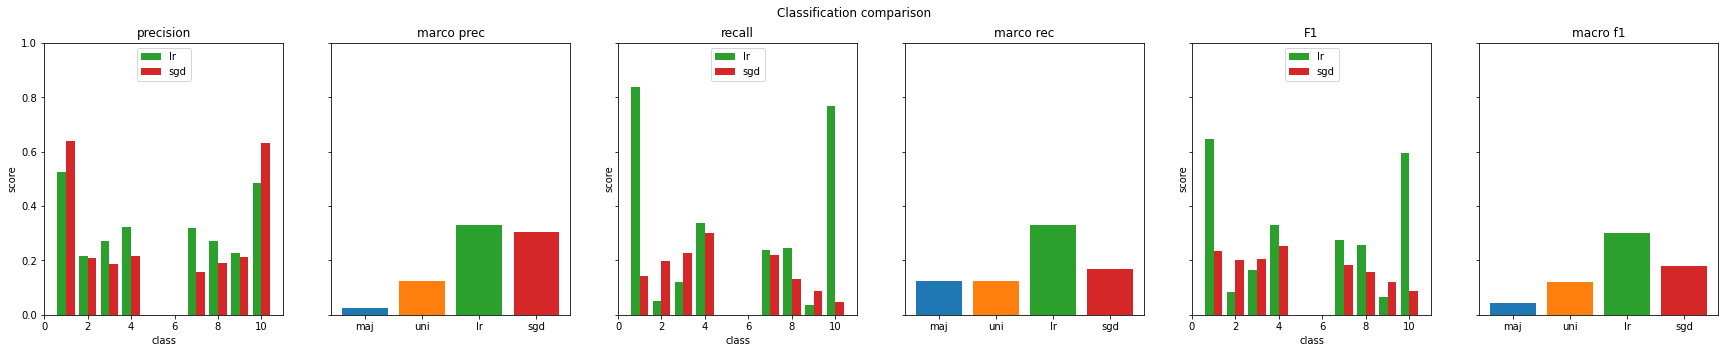

In [78]:

labels = [1,2,3,4,7,8,9,10]
labels_name = ["1","2","3","4","7","8","9","10"]
labels_axis = np.array(labels)

prfs_maj = prfs(Y_test.astype('int'), Y_pred_test_maj.astype('int'), labels=labels, average=None)
prfs_uni = prfs(Y_test.astype('int'), Y_pred_test_uni.astype('int'), labels=labels, average=None)
prfs_lr = prfs(Y_test.astype('int'), Y_pred_test_lr.astype('int'), labels=labels, average=None)
prfs_sgd = prfs(Y_test.astype('int'), Y_pred_test_sgd.astype('int'), labels=labels, average=None)

prfs_maj_macro = prfs(Y_test.astype('int'), Y_pred_test_maj.astype('int'), labels=labels, average="macro")
prfs_uni_macro = prfs(Y_test.astype('int'), Y_pred_test_uni.astype('int'), labels=labels, average="macro")
prfs_lr_macro = prfs(Y_test.astype('int'), Y_pred_test_lr.astype('int'), labels=labels, average="macro")
prfs_sgd_macro = prfs(Y_test.astype('int'), Y_pred_test_sgd.astype('int'), labels=labels, average="macro")

pyplot.show()


fig1, plots = pyplot.subplots(1,6, sharey=True, figsize=(30, 5))
fig1.suptitle('Classification comparison')


#plots.set_xticks([1,2,3,4,7,8,9,10])
width=0.2

plots[0].bar(labels_axis-width, prfs_lr[0], width*2, label="lr", color="tab:green")
plots[0].bar(labels_axis+width, prfs_sgd[0], width*2, label="sgd", color="tab:red")
plots[0].set_title("precision")

plots[0].set_ylim([0,1])
plots[0].set_xlim([0,11])
plots[0].set_xlabel("class")
plots[0].set_ylabel("score")
plots[0].legend(loc='upper center')

plots[1].bar(["maj","uni","lr","sgd"], [prfs_maj_macro[0], prfs_uni_macro[0], prfs_lr_macro[0], prfs_sgd_macro[0]], color=["tab:blue", "tab:orange", "tab:green", "tab:red"])
plots[1].set_title("marco prec")
plots[3].bar(["maj","uni","lr","sgd"], [prfs_maj_macro[1], prfs_uni_macro[1], prfs_lr_macro[1], prfs_sgd_macro[1]], color=["tab:blue", "tab:orange", "tab:green", "tab:red"])
plots[3].set_title("marco rec")
plots[5].bar(["maj","uni","lr","sgd"], [prfs_maj_macro[2], prfs_uni_macro[2], prfs_lr_macro[2], prfs_sgd_macro[2]], color=["tab:blue", "tab:orange", "tab:green", "tab:red"])
plots[5].set_title("macro f1")

plots[2].bar(labels_axis-width, prfs_lr[1], width*2, label="lr", color="tab:green")
plots[2].bar(labels_axis+width, prfs_sgd[1], width*2, label="sgd", color="tab:red")
plots[2].set_title("recall")

plots[2].set_ylim([0,1])
plots[2].set_xlim([0,11])
plots[2].set_xlabel("class")
plots[2].set_ylabel("score")
plots[2].legend(loc='upper center')


plots[4].bar(labels_axis-width, prfs_lr[2], width*2, label="lr", color="tab:green")
plots[4].bar(labels_axis+width, prfs_sgd[2], width*2, label="sgd", color="tab:red")
plots[4].set_title("F1")

plots[4].set_ylim([0,1])
plots[4].set_xlim([0,11])
plots[4].set_xlabel("class")
plots[4].set_ylabel("score")
plots[4].legend(loc='upper center')

pyplot.show()


The distribution of the precision is less balanced for SGD: it tends to often predict the extremes. LR is slightly more balanced. But the difference is not remarkable.

The distribution of the recall instead is really unbalanced for LR, which is good with the extremes. The worst case of SGD are comparable, but the best are not.

Looking at SGD we can say that it very rarely predicts the extremes, but when it does it is often correct.

We could see all this from the confusion tables, normalizing by rows or by column, with normalized color or not

We can look at the confusion tables

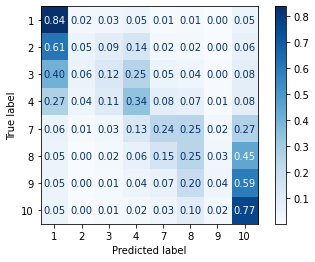

In [79]:
# differences between classes in recall
disp1 = ConfusionMatrixDisplay.from_estimator(classifier_lr, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])

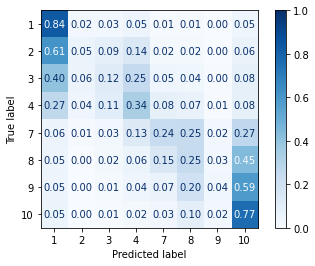

In [80]:
# magnitude of the difference in recall
disp2 = ConfusionMatrixDisplay.from_estimator(classifier_lr, X_test, Y_test, normalize='true', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])
disp2.ax_.get_images()[0].set_clim(0, 1)


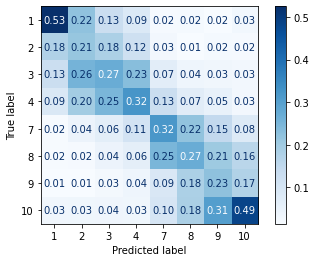

In [81]:
# difference between classes in precision
disp3 = ConfusionMatrixDisplay.from_estimator(classifier_lr, X_test, Y_test, normalize='pred', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])


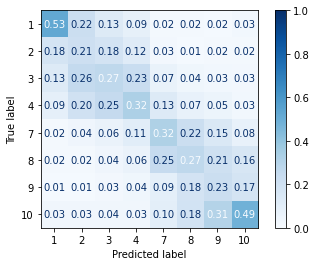

In [82]:
# magnitude of the difference in precision
disp4 = ConfusionMatrixDisplay.from_estimator(classifier_lr, X_test, Y_test, normalize='pred', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])
disp4.ax_.get_images()[0].set_clim(0, 1)

Same thing can be done for the other model

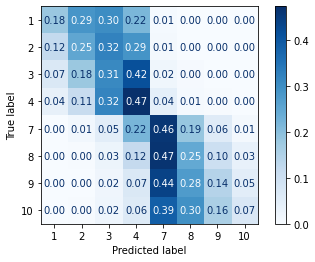

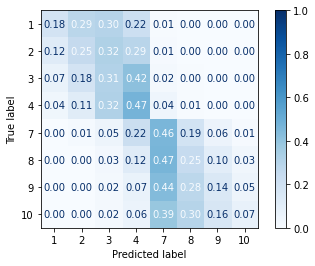

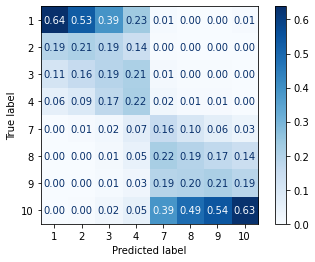

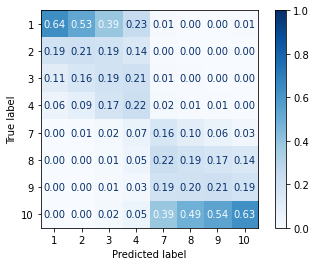

In [83]:
disp1 = ConfusionMatrixDisplay.from_predictions(Y_test.astype('int'), Y_pred_test_sgd.astype('int'), normalize='true', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])
disp2 = ConfusionMatrixDisplay.from_predictions(Y_test.astype('int'), Y_pred_test_sgd.astype('int'), normalize='true', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])
disp2.ax_.get_images()[0].set_clim(0, 1)
disp3 = ConfusionMatrixDisplay.from_predictions(Y_test.astype('int'), Y_pred_test_sgd.astype('int'), normalize='pred', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])
disp4 = ConfusionMatrixDisplay.from_predictions(Y_test.astype('int'), Y_pred_test_sgd.astype('int'), normalize='pred', cmap=plt.cm.Blues, values_format=".2f", labels=[1,2,3,4,7,8,9,10])
disp4.ax_.get_images()[0].set_clim(0, 1)

## Pre-processing

Let's try some pre-processing of the data and see if that improves the performances

### Stemming

In [84]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize,sent_tokenize,WhitespaceTokenizer

nltk.download('punkt') # necessary for being able to tokenize

stemmer = SnowballStemmer("english")
tokenizer = WhitespaceTokenizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:
def stemsent(sentence):
    words = [stemmer.stem(word) for word in tokenizer.tokenize(str(sentence))]
    return " ".join(words)

print(train_corpus[0])
print(str(stemsent(train_corpus[0])))

if not os.path.exists(os.path.join(os.getcwd(), "Datasets", "Stemmed", "aclImdb")):
    os.makedirs(os.path.join(os.getcwd(), "Datasets", "Stemmed", "aclImdb"))

stemmed_file = os.path.join(os.getcwd(), "Datasets", "Stemmed", "aclImdb", "train.txt")
if not os.path.exists(stemmed_file):
    with open(stemmed_file, "w") as f:
        st_train_corpus = [stemsent(sentence) for sentence in train_corpus]
        for sentence in st_train_corpus:
            f.write(sentence)
            f.write("\n")
else:
    with open(stemmed_file, 'r') as f:
        st_train_corpus = f.readlines()

stemmed_file = os.path.join(os.getcwd(), "Datasets", "Stemmed", "aclImdb", "test.txt")
if not os.path.exists(stemmed_file):
    with open(stemmed_file, "w") as f:
        st_test_corpus = [stemsent(sentence) for sentence in test_corpus]
        for sentence in st_test_corpus:
            f.write(sentence)
            f.write("\n")
else:
    with open(stemmed_file, "r") as f:
        st_test_corpus = f.readlines()

Caution: May contain spoilers...<br /><br />I've seen this movie 3 times & I've liked it every time. Upon seeing it again, I'm always reminded of how good it is. An HBO TV movie- very well done like most of their movies are- this would've gotten Oscars for it's performances had it been released for general distribution instead of made for TV.<br /><br />As I'm sure anyone knows from reading other reviews here, this is the story of serial murderer, Andrei Chikatilo. He murdered 56 people over 8 years in the former Soviet Union. (3 victims were buried & couldn't be found so he was only convicted of 52 out of 53 of his murders.) The story actually focuses more on the forensic analyst, Victor Burakov played to perfection by Stephen Rea. A man that becomes tortured and obsessed with finding this killer despite the additional obstacles placed by party hacks, his part is essential to be sure. There is a very touching scene towards the end of the movie that mentions how in America, investigato

In [86]:
print(st_train_corpus[0])

print("Processing corpus\n")
st_vectorizer =  TfidfVectorizer()
st_X_train = st_vectorizer.fit_transform(st_train_corpus)
st_X_test = st_vectorizer.transform(st_test_corpus)

print("Shape of the matrix: (data points, features)")
print(st_X_train.shape)
print()

caution: may contain spoilers...<br /><br />i'v seen this movi 3 time & i'v like it everi time. upon see it again, i'm alway remind of how good it is. an hbo tv movie- veri well done like most of their movi are- this would'v gotten oscar for it perform had it been releas for general distribut instead of made for tv.<br /><br />as i'm sure anyon know from read other review here, this is the stori of serial murderer, andrei chikatilo. he murder 56 peopl over 8 year in the former soviet union. (3 victim were buri & couldn't be found so he was onli convict of 52 out of 53 of his murders.) the stori actual focus more on the forens analyst, victor burakov play to perfect by stephen rea. a man that becom tortur and obsess with find this killer despit the addit obstacl place by parti hacks, his part is essenti to be sure. there is a veri touch scene toward the end of the movi that mention how in america, investig are routin taken off serial killer case after 18 month whether they want to or no

### Lemmatization

In [87]:
from nltk.stem import WordNetLemmatizer

nltk.download('omw-1.4')
nltk.download('wordnet') 
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [88]:
def lemsent(sentence):
    words = [lemmatizer.lemmatize(word) for word in tokenizer.tokenize(str(sentence))]
    return " ".join(words)

print(train_corpus[0])
print(str(lemsent(train_corpus[0])))


if not os.path.exists(os.path.join(os.getcwd(), "Datasets", "Lemmatized", "aclImdb")):
    os.makedirs(os.path.join(os.getcwd(), "Datasets", "Lemmatized", "aclImdb"))

lemmatized_file = os.path.join(os.getcwd(), "Datasets", "Lemmatized", "aclImdb", "train.txt")
if not os.path.exists(lemmatized_file):
    with open(lemmatized_file, "w") as f:
        lem_train_corpus = [lemsent(sentence) for sentence in train_corpus]
        for sentence in lem_train_corpus:
            f.write(sentence)
            f.write("\n")
else:
    with open(lemmatized_file, "r") as f:
        lem_train_corpus = f.readlines()

lemmatized_file = os.path.join(os.getcwd(), "Datasets", "Lemmatized", "aclImdb", "test.txt")
if not os.path.exists(lemmatized_file):
    with open(lemmatized_file, "w") as f:
        lem_test_corpus = [lemsent(sentence) for sentence in test_corpus]
        for sentence in lem_test_corpus:
            f.write(sentence)
            f.write("\n")
else:
    with open(lemmatized_file, "r") as f:
        lem_test_corpus = f.readlines()

Caution: May contain spoilers...<br /><br />I've seen this movie 3 times & I've liked it every time. Upon seeing it again, I'm always reminded of how good it is. An HBO TV movie- very well done like most of their movies are- this would've gotten Oscars for it's performances had it been released for general distribution instead of made for TV.<br /><br />As I'm sure anyone knows from reading other reviews here, this is the story of serial murderer, Andrei Chikatilo. He murdered 56 people over 8 years in the former Soviet Union. (3 victims were buried & couldn't be found so he was only convicted of 52 out of 53 of his murders.) The story actually focuses more on the forensic analyst, Victor Burakov played to perfection by Stephen Rea. A man that becomes tortured and obsessed with finding this killer despite the additional obstacles placed by party hacks, his part is essential to be sure. There is a very touching scene towards the end of the movie that mentions how in America, investigato

In [89]:
print("Processing corpus\n")
lem_vectorizer =  TfidfVectorizer()
lem_X_train = lem_vectorizer.fit_transform(lem_train_corpus)
lem_X_test = lem_vectorizer.transform(lem_test_corpus)

print("Shape of the matrix: (data points, features)")
print(lem_X_train.shape)
print()

Processing corpus

Shape of the matrix: (data points, features)
(25000, 73056)



Let's train new classifiers

In [90]:
st_classifier_lr = SGDRegressor(max_iter=1000)
st_classifier_lr.fit(st_X_train, Y_train)
st_Y_pred_test_lr = st_classifier_lr.predict(st_X_test)

In [91]:
lem_classifier_lr = SGDRegressor(max_iter=1000)
lem_classifier_lr.fit(lem_X_train, Y_train)
lem_Y_pred_test_lr = lem_classifier_lr.predict(lem_X_test)

In [92]:

st_r2_lr = r2_score(Y_test, st_Y_pred_test_lr)
st_mae_lr = mean_absolute_error(Y_test, st_Y_pred_test_lr)
st_mse_lr = mean_squared_error(Y_test, st_Y_pred_test_lr)
st_prfs_lr_macro = prfs(Y_test.astype('int'), st_Y_pred_test_lr.astype('int'), labels=[1,2,3,4,7,8,9,10], average="macro")


lem_r2_lr = r2_score(Y_test, lem_Y_pred_test_lr)
lem_mae_lr = mean_absolute_error(Y_test, lem_Y_pred_test_lr)
lem_mse_lr = mean_squared_error(Y_test, lem_Y_pred_test_lr)
lem_prfs_lr_macro = prfs(Y_test.astype('int'), lem_Y_pred_test_lr.astype('int'), labels=[1,2,3,4,7,8,9,10], average="macro")

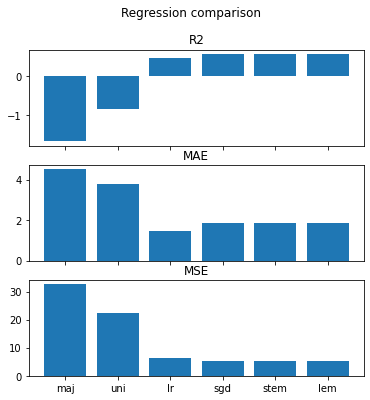

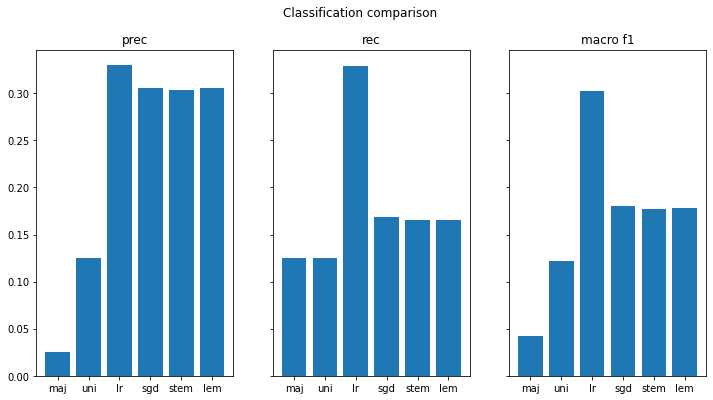

In [93]:

fig, plots = pyplot.subplots(3, sharex=True, figsize=(6, 6))
fig.suptitle('Regression comparison')
plots[0].bar(["maj","uni","lr","sgd","stem","lem"], [r2_maj, r2_uni, r2_lr, r2_sgd, st_r2_lr, lem_r2_lr])
plots[0].set_title("R2")
plots[1].bar(["maj","uni","lr","sgd","stem","lem"], [mae_maj, mae_uni, mae_lr, mae_sgd, st_mae_lr, lem_mae_lr])
plots[1].set_title("MAE")
plots[2].bar(["maj","uni","lr","sgd","stem","lem"], [mse_maj, mse_uni, mse_lr, mse_sgd, st_mse_lr, lem_mse_lr])
plots[2].set_title("MSE")

pyplot.show()

fig2, plots = pyplot.subplots(1,3, sharey=True, figsize=(12, 6))
fig2.suptitle('Classification comparison')
plots[0].bar(["maj","uni","lr","sgd","stem","lem"], [prfs_maj_macro[0], prfs_uni_macro[0], prfs_lr_macro[0], prfs_sgd_macro[0], st_prfs_lr_macro[0], lem_prfs_lr_macro[0]])
# plots[0].set_ylim([0, 1])
plots[0].set_title("prec")
plots[1].bar(["maj","uni","lr","sgd","stem","lem"], [prfs_maj_macro[1], prfs_uni_macro[1], prfs_lr_macro[1], prfs_sgd_macro[1], st_prfs_lr_macro[1], lem_prfs_lr_macro[1]])
plots[1].set_title("rec")
plots[2].bar(["maj","uni","lr","sgd","stem","lem"], [prfs_maj_macro[2], prfs_uni_macro[2], prfs_lr_macro[2], prfs_sgd_macro[2], st_prfs_lr_macro[2], lem_prfs_lr_macro[2]])
plots[2].set_title("macro f1")

pyplot.show()

## Word Embeddings

Download and unzip glove

In [94]:
import zipfile
    
url = "https://nlp.stanford.edu/data/glove.6B.zip"

glove_path = os.path.join(os.getcwd(),"Glove")
glove_zip = os.path.join(os.getcwd(),"Glove", "glove.6B.zip")

if not os.path.exists(glove_path):
    os.makedirs(glove_path)

if not os.path.exists(glove_zip):
    urllib.request.urlretrieve(url, glove_zip)
    print("Successful download")

with zipfile.ZipFile(glove_zip, 'r') as zip_ref:
    zip_ref.extractall(path=glove_path)
    print("Successful extraction")

Successful extraction


In [95]:
import numpy as np

glove_file = os.path.join(os.getcwd(),"Glove", "glove.6B.50d.txt")

print ("Loading Glove Model")
with open(glove_file, encoding="utf8" ) as f:
    lines = f.readlines()
vocabulary = {}
for line in lines:
    splits = line.split()
    vocabulary[splits[0]] = np.array([float(val) for val in splits[1:]])
print ("Done.",len(vocabulary.keys())," words loaded!")

Loading Glove Model
Done. 400000  words loaded!


In [96]:
def findembedding(word):
    if word in vocabulary.keys():
        embedding = vocabulary[word]
    else:
        embedding = [0]*50
    return embedding

def glovesent(sentence):
    matrix = [findembedding(word) for word in tokenizer.tokenize(str(sentence))]
    matrix = np.array(matrix)
    return np.average(matrix, axis=0)


glove_X_train = np.array([glovesent(sentence) for sentence in train_corpus])
glove_X_test = np.array([glovesent(sentence) for sentence in test_corpus])

print(glove_X_train.shape)


(25000, 50)


Train classifier

In [97]:
glove_classifier = SGDRegressor(max_iter=1000)
glove_classifier.fit(glove_X_train, Y_train)
glove_Y_pred_test = glove_classifier.predict(glove_X_test)

glove_r2_lr = r2_score(Y_test, glove_Y_pred_test)
glove_mae_lr = mean_absolute_error(Y_test, glove_Y_pred_test)
glove_mse_lr = mean_squared_error(Y_test, glove_Y_pred_test)
glove_prfs_lr_macro = prfs(Y_test.astype('int'), glove_Y_pred_test.astype('int'), labels=[1,2,3,4,7,8,9,10], average="macro")

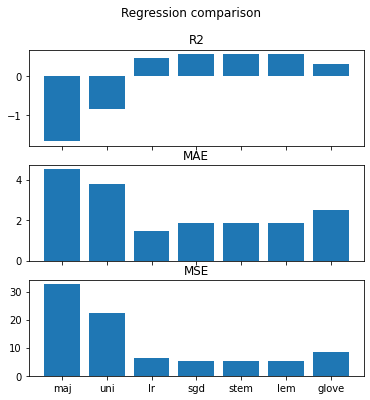

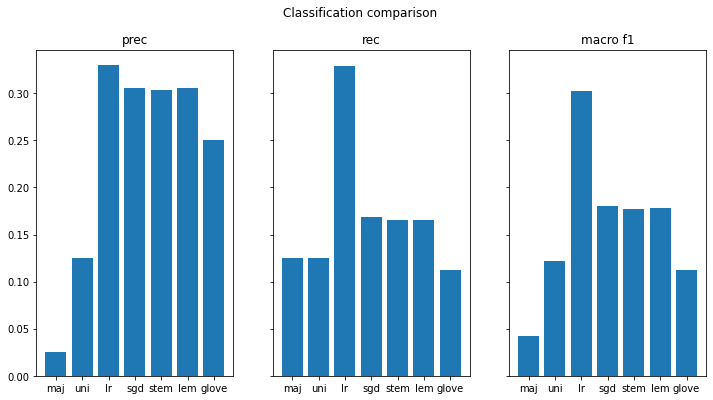

In [98]:

fig, plots = pyplot.subplots(3, sharex=True, figsize=(6, 6))
fig.suptitle('Regression comparison')
plots[0].bar(["maj","uni","lr","sgd","stem","lem","glove"], [r2_maj, r2_uni, r2_lr, r2_sgd, st_r2_lr, lem_r2_lr, glove_r2_lr])
plots[0].set_title("R2")
plots[1].bar(["maj","uni","lr","sgd","stem","lem","glove"], [mae_maj, mae_uni, mae_lr, mae_sgd, st_mae_lr, lem_mae_lr, glove_mae_lr])
plots[1].set_title("MAE")
plots[2].bar(["maj","uni","lr","sgd","stem","lem","glove"], [mse_maj, mse_uni, mse_lr, mse_sgd, st_mse_lr, lem_mse_lr, glove_mse_lr])
plots[2].set_title("MSE")


pyplot.show()

fig2, plots = pyplot.subplots(1,3, sharey=True, figsize=(12, 6))
fig2.suptitle('Classification comparison')
plots[0].bar(["maj","uni","lr","sgd","stem","lem","glove"], [prfs_maj_macro[0], prfs_uni_macro[0], prfs_lr_macro[0], prfs_sgd_macro[0], st_prfs_lr_macro[0], lem_prfs_lr_macro[0], glove_prfs_lr_macro[0]])
plots[0].set_title("prec")
plots[1].bar(["maj","uni","lr","sgd","stem","lem","glove"], [prfs_maj_macro[1], prfs_uni_macro[1], prfs_lr_macro[1], prfs_sgd_macro[1], st_prfs_lr_macro[1], lem_prfs_lr_macro[1], glove_prfs_lr_macro[1]])
plots[1].set_title("rec")
plots[2].bar(["maj","uni","lr","sgd","stem","lem","glove"], [prfs_maj_macro[2], prfs_uni_macro[2], prfs_lr_macro[2], prfs_sgd_macro[2], st_prfs_lr_macro[2], lem_prfs_lr_macro[2], glove_prfs_lr_macro[2]])
plots[2].set_title("macro f1")

pyplot.show()

Credits:
Andrea Galassi,
Federico Ruggeri,
Paolo Torroni
(Oct 2020, Updated Oct 2022)